In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from matplotlib import rcParams

%matplotlib inline

In [88]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,7

In [89]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [90]:
linreg = LinearRegression()
knn = KNeighborsRegressor(n_neighbors = 5)
knn_w = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')

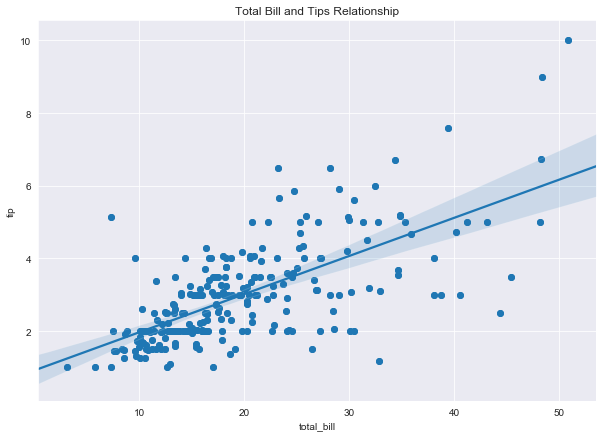

In [91]:
X = df['total_bill'] 
y = df['tip']

plt.scatter(X,y)
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.title('Total Bill and Tips Relationship')
sns.regplot(X,y)
plt.show()

In [92]:
X = X.to_frame()
y = y.to_frame()

In [93]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 5)
linreg.fit(X_train, y_train)
print('coeficient:', linreg.coef_)
print('intercept:', linreg.intercept_)
print('score:', linreg.score(X_test, y_test))


coeficient: [[0.10326799]]
intercept: [0.9543696]
score: 0.5219792849348619


In [94]:
knn.fit(X, y)
print('score:', knn.score(X, y))

score: 0.562977121143492


In [95]:
print('coeficient:', linreg.coef_)
print('intercept:', linreg.intercept_)
print('score without holdouts:', linreg.score(X,y))
print()

for i in range(1,11):
    print('holdout of {}%'.format(i*10))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i*10)
    linreg.fit(X_train, y_train)
    print('score:', linreg.score(X_test, y_test))
    print()
    
    

coeficient: [[0.10326799]]
intercept: [0.9543696]
score without holdouts: 0.45648863568112197

holdout of 10%
score: -0.3532113483380335

holdout of 20%
score: 0.4808061936598098

holdout of 30%
score: 0.47253206344590093

holdout of 40%
score: 0.5305451196977866

holdout of 50%
score: 0.07390916150811888

holdout of 60%
score: 0.2810164510253844

holdout of 70%
score: 0.6038484061499908

holdout of 80%
score: 0.03846191697529877

holdout of 90%
score: 0.4907546662082045

holdout of 100%
score: 0.3233241046182246



In [97]:
print('coeficient:', linreg.coef_)
print('intercept:', linreg.intercept_)
print('score without holdouts:', linreg.score(X,y))
print()

for i in range(2,11):
    print('holdout of {}%'.format(i*10))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i*10)
    linreg.fit(X_train, y_train)
    print('score:', linreg.score(X_test, y_test))
    print(cross_val_score(linreg, X_test, y_test, cv=i))
    print()
    
    

coeficient: [[0.10556721]]
intercept: [0.95645613]
score without holdouts: 0.4554495261795889

holdout of 20%
score: 0.6861449678341038
[0.73410153 0.53187787]

holdout of 30%
score: 0.5519881223325293
[ 0.32291646  0.65384486 -0.23565546]

holdout of 40%
score: -0.06747709305528393
[ 0.54718573 -0.23811447 -0.12237078  0.3094051 ]

holdout of 50%
score: 0.5550453142741723
[0.6418512  0.52082036 0.3303508  0.15663623 0.72459676]

holdout of 60%
score: 0.453729846296106
[ 0.24466135 -0.07529654  0.19811084 -0.26030579 -0.1406734   0.4180188 ]

holdout of 70%
score: 0.1689926686295189
[ 0.52947903 -0.94438811  0.48036549  0.16735688  0.36511277 -0.16032713
 -0.81549656]

holdout of 80%
score: 0.32382164585535644
[ 0.28403787  0.22313228 -0.58991769  0.6928105   0.24593357 -0.44310303
 -0.13187772  0.48642463]

holdout of 90%
score: 0.47750997734384726
[ 0.54107947  0.67310116  0.42545635  0.00241932  0.42257101  0.00106443
 -0.70338744  0.38030622  0.00915704]

holdout of 100%
score: 0.3

In [98]:
len(df)

244

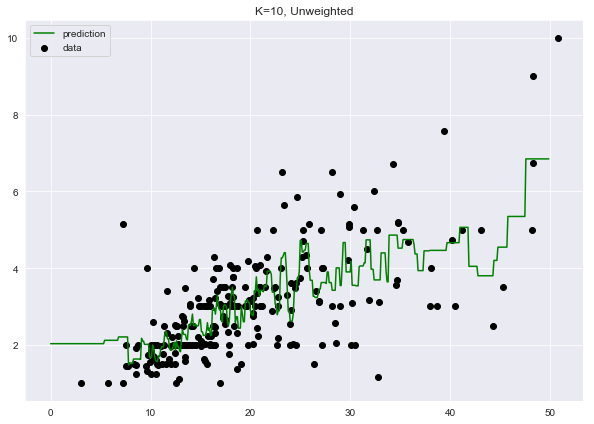

In [99]:
knn.fit(X, y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

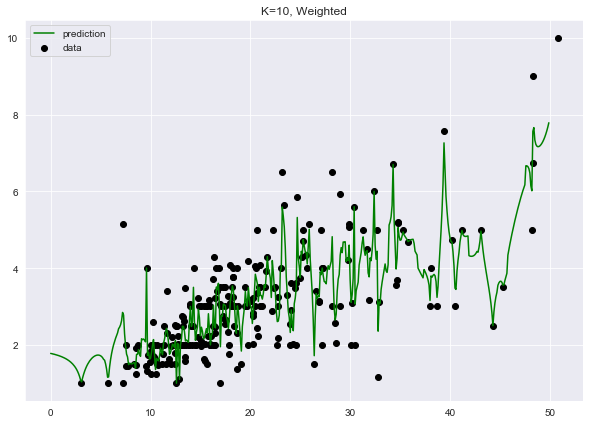

In [100]:
knn_w.fit(X, y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis] # tell me about this syntax

Y_ = knn_w.predict(T)

plt.scatter(X, y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [101]:
score = cross_val_score(knn, X, y, cv=5)
print('Unweighted Accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() *2))
score_w = cross_val_score(knn_w, X, y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.33 (+/-0.36)
Weighted Accuracy: 0.22 (+/- 0.30


K: 1


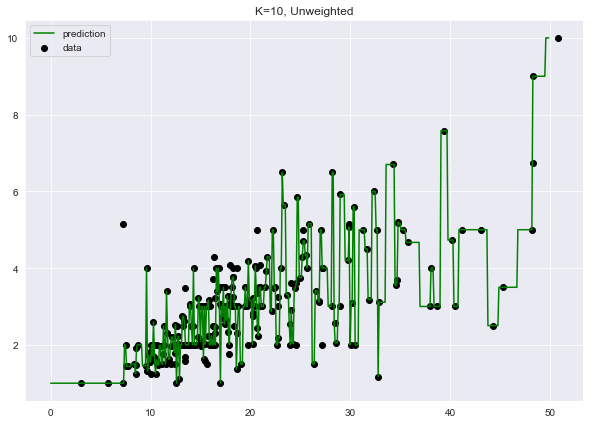

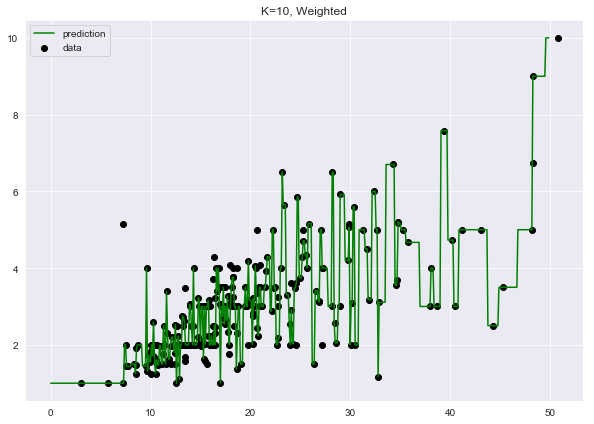

Unweighted Accuracy: 0.02 (+/-0.24)
Weighted Accuracy: 0.02 (+/- 0.24


K: 2


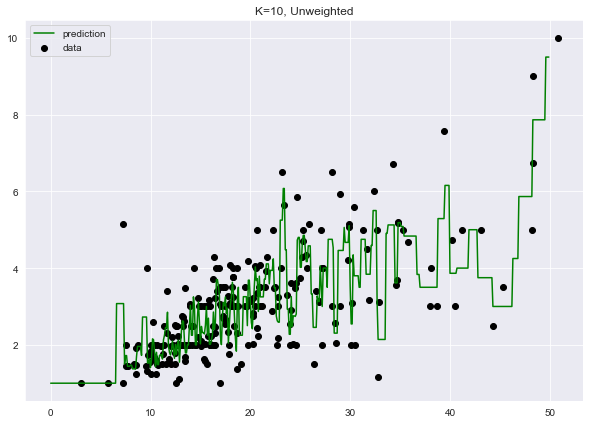

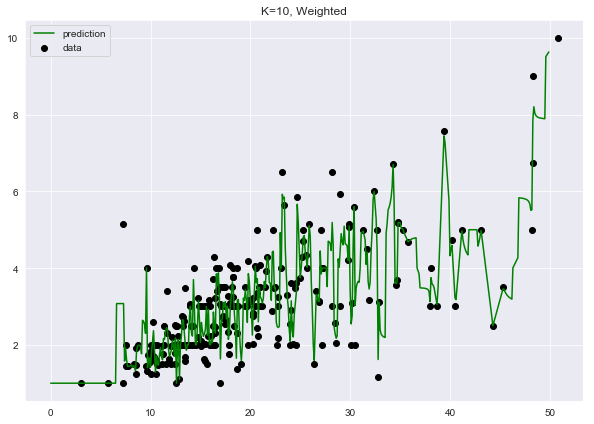

Unweighted Accuracy: 0.16 (+/-0.29)
Weighted Accuracy: 0.10 (+/- 0.16


K: 3


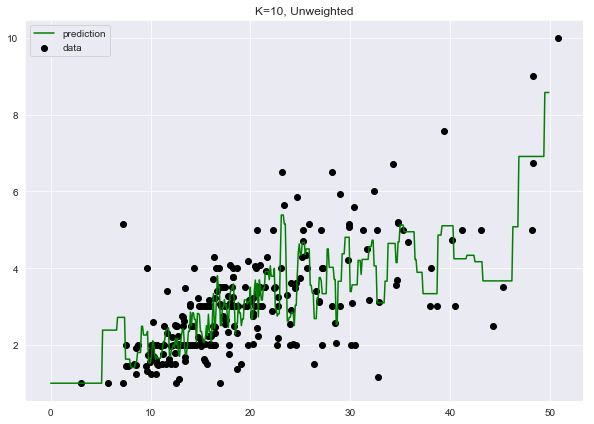

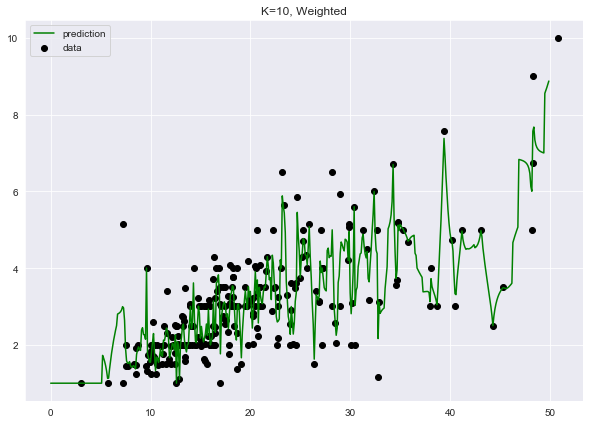

Unweighted Accuracy: 0.26 (+/-0.37)
Weighted Accuracy: 0.17 (+/- 0.27


K: 4


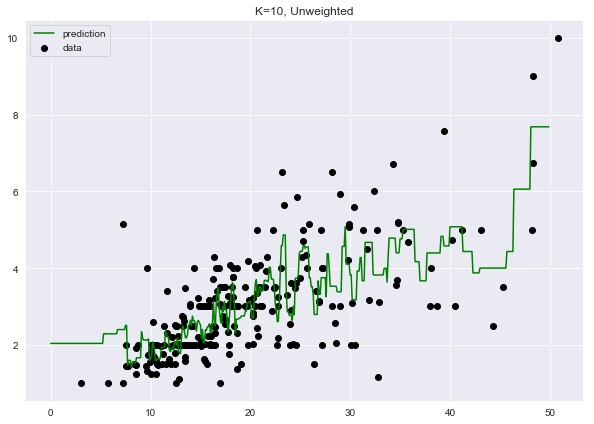

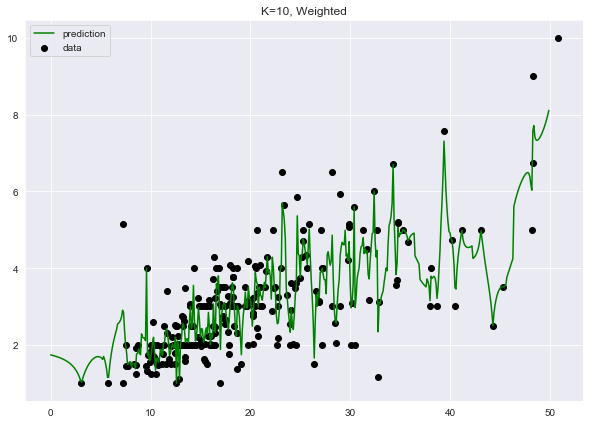

Unweighted Accuracy: 0.31 (+/-0.39)
Weighted Accuracy: 0.20 (+/- 0.29


K: 5


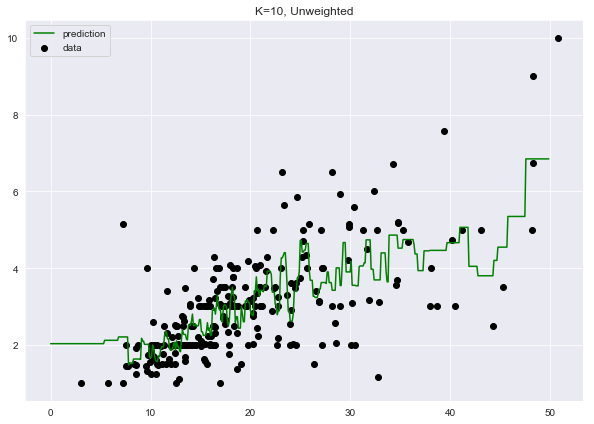

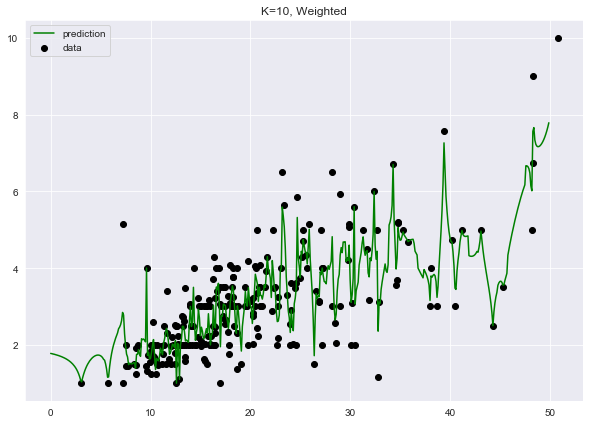

Unweighted Accuracy: 0.33 (+/-0.36)
Weighted Accuracy: 0.22 (+/- 0.30


K: 6


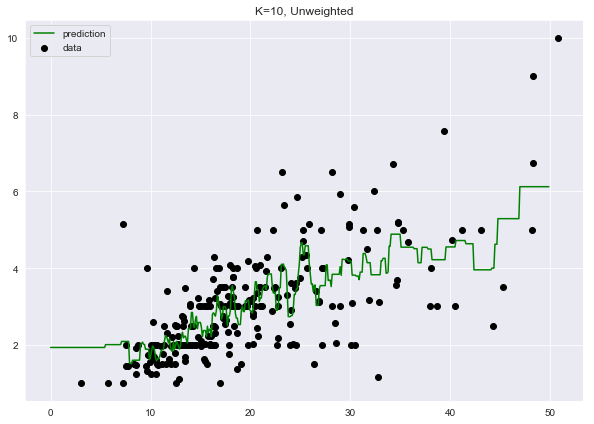

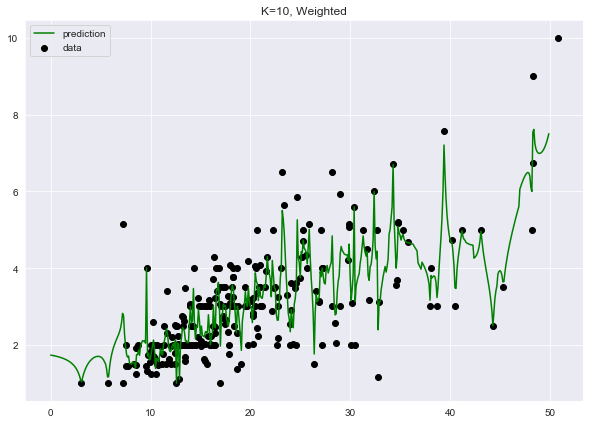

Unweighted Accuracy: 0.37 (+/-0.30)
Weighted Accuracy: 0.24 (+/- 0.29


K: 7


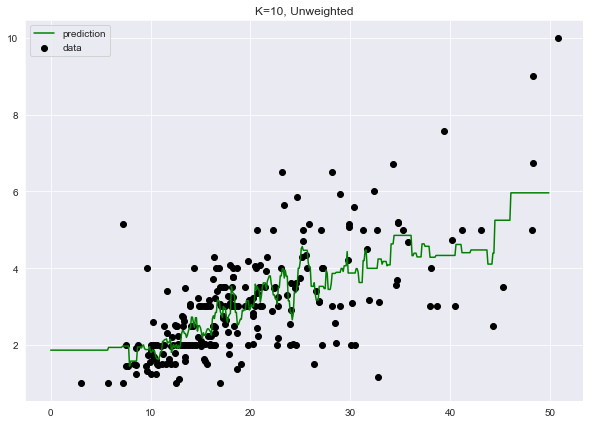

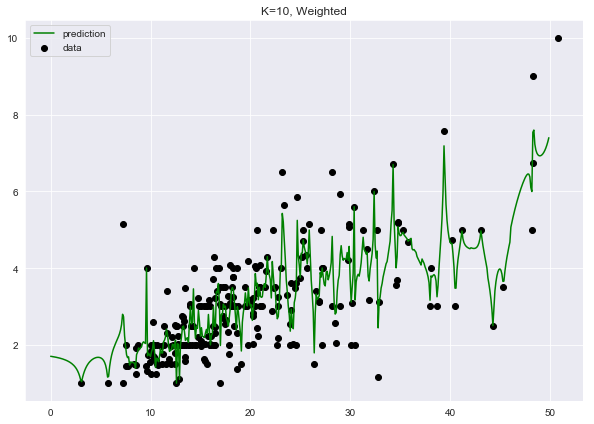

Unweighted Accuracy: 0.34 (+/-0.27)
Weighted Accuracy: 0.24 (+/- 0.29


K: 8


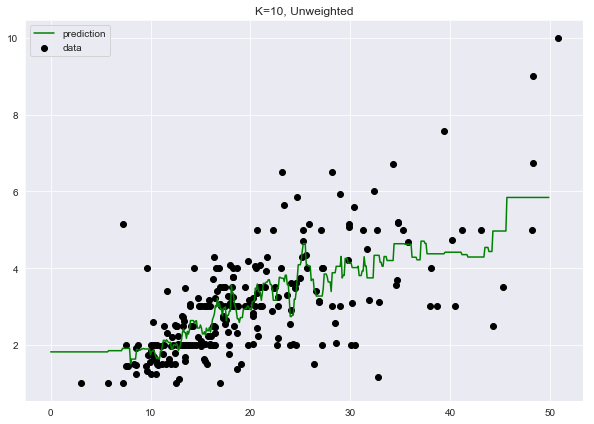

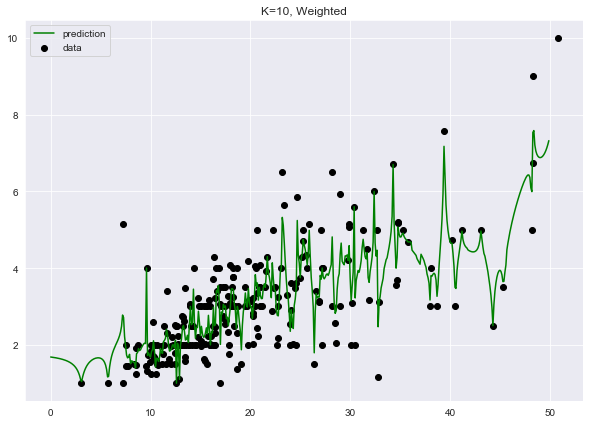

Unweighted Accuracy: 0.34 (+/-0.26)
Weighted Accuracy: 0.25 (+/- 0.29


K: 9


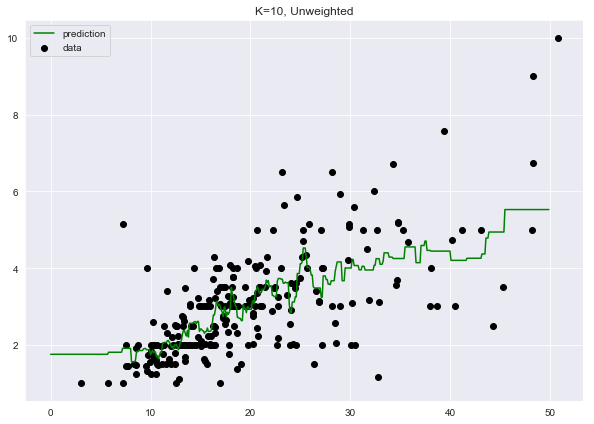

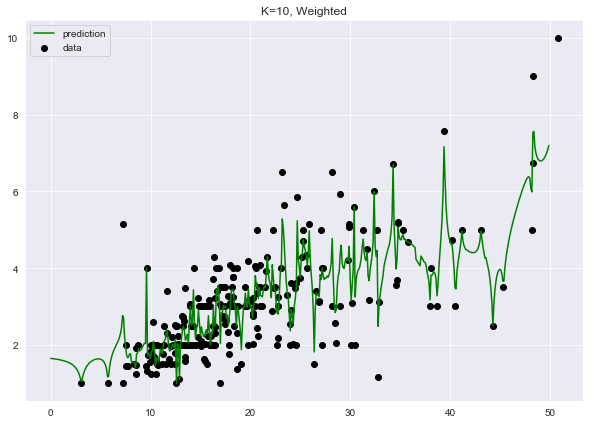

Unweighted Accuracy: 0.36 (+/-0.27)
Weighted Accuracy: 0.25 (+/- 0.29


K: 10


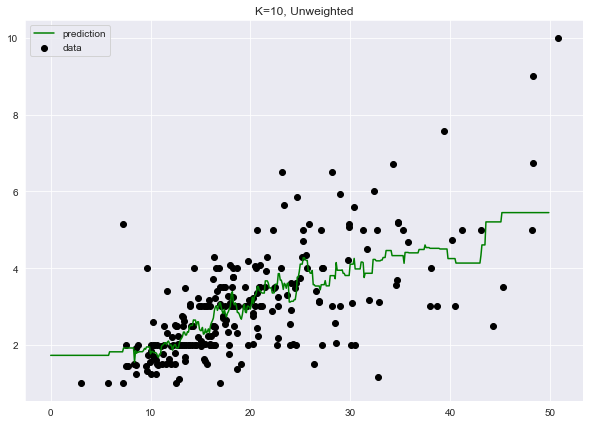

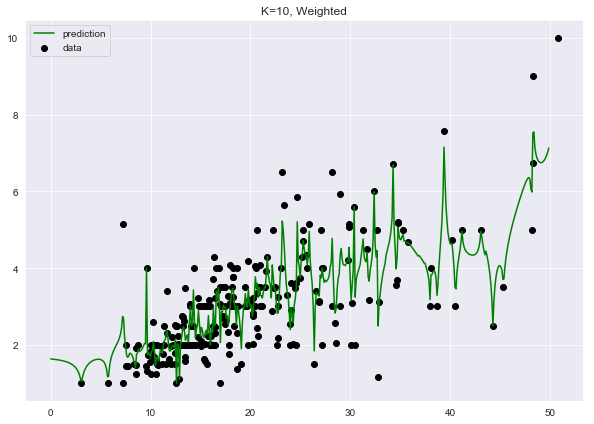

Unweighted Accuracy: 0.36 (+/-0.27)
Weighted Accuracy: 0.26 (+/- 0.29


K: 11


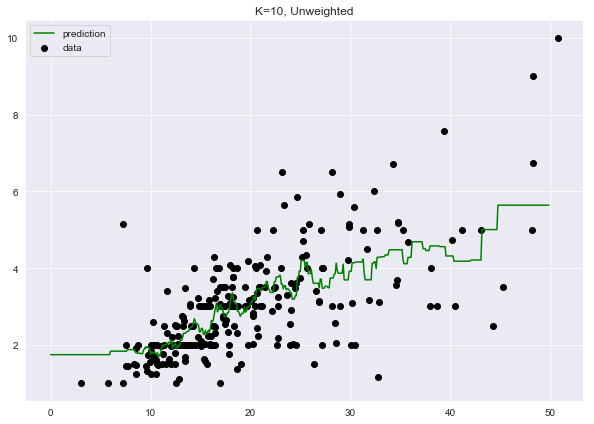

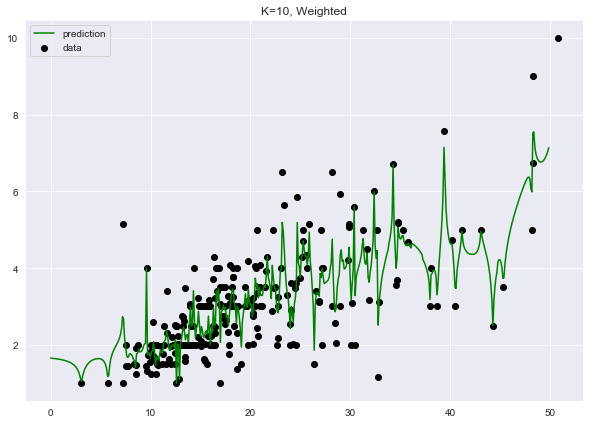

Unweighted Accuracy: 0.35 (+/-0.24)
Weighted Accuracy: 0.26 (+/- 0.29


K: 12


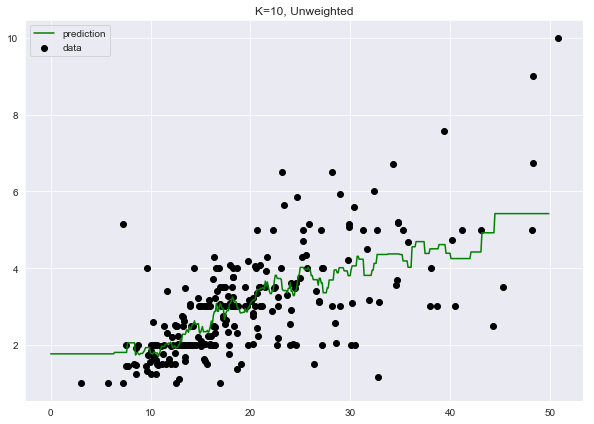

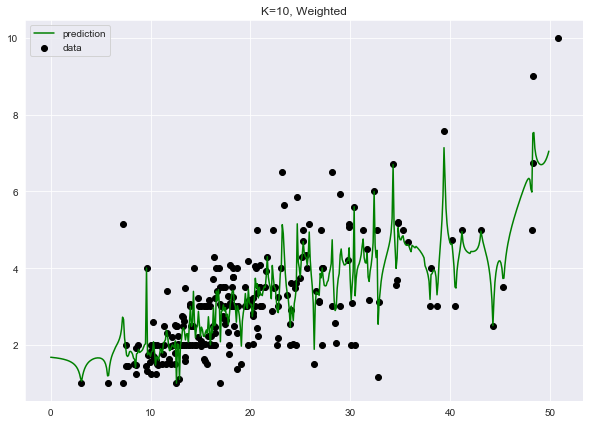

Unweighted Accuracy: 0.35 (+/-0.26)
Weighted Accuracy: 0.26 (+/- 0.29


K: 13


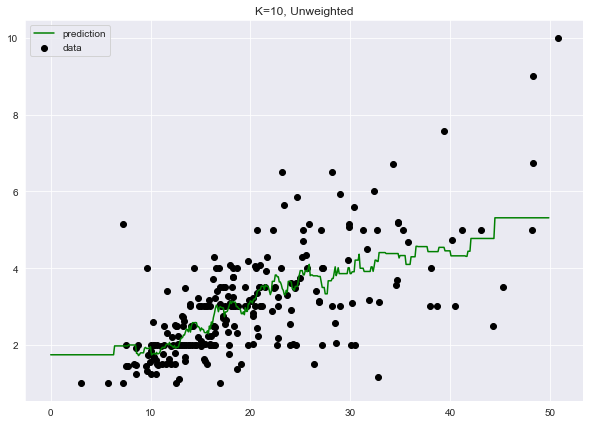

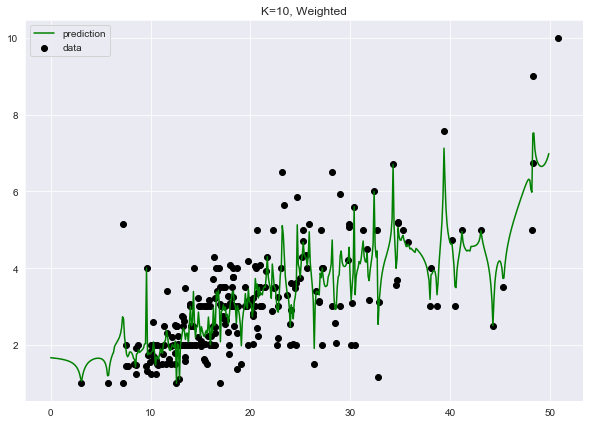

Unweighted Accuracy: 0.36 (+/-0.27)
Weighted Accuracy: 0.27 (+/- 0.29


K: 14


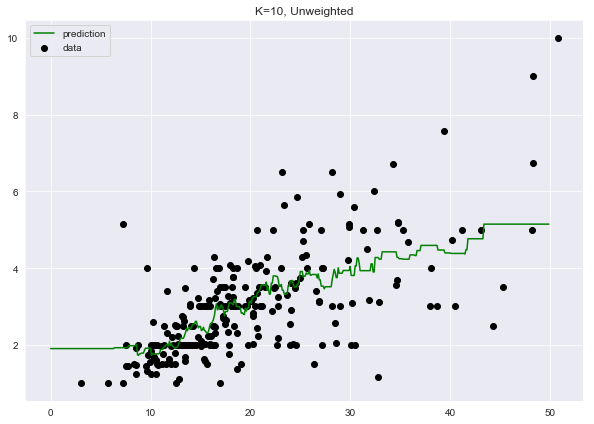

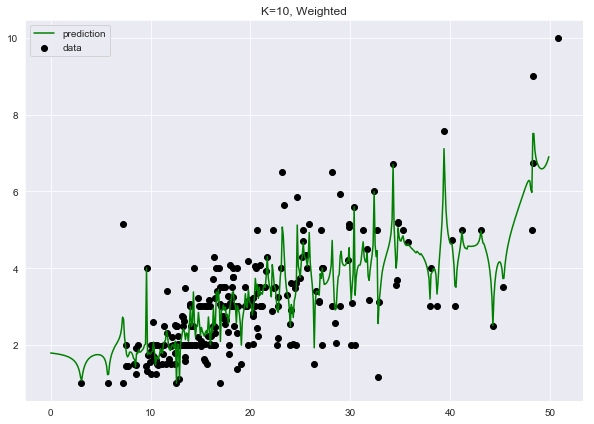

Unweighted Accuracy: 0.36 (+/-0.26)
Weighted Accuracy: 0.27 (+/- 0.29


K: 15


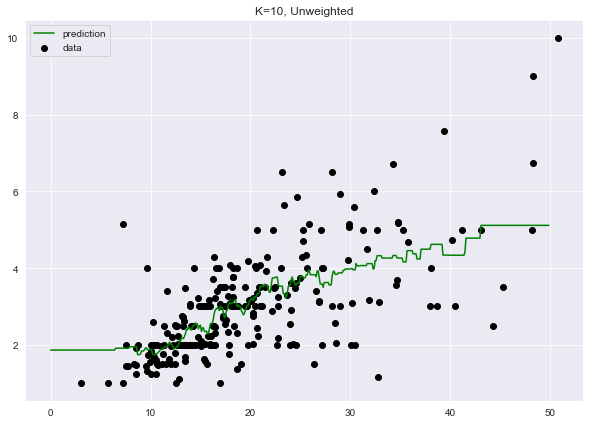

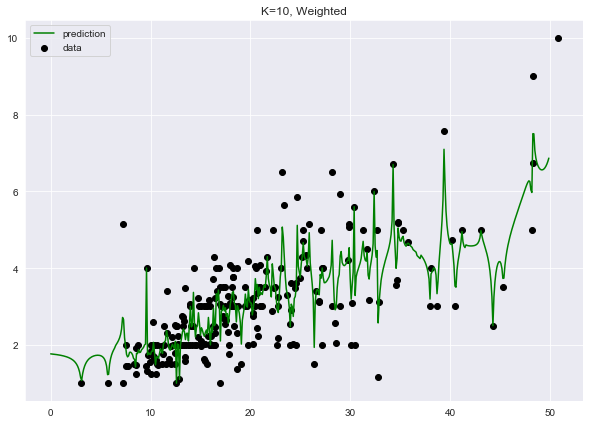

Unweighted Accuracy: 0.37 (+/-0.27)
Weighted Accuracy: 0.27 (+/- 0.29


K: 16


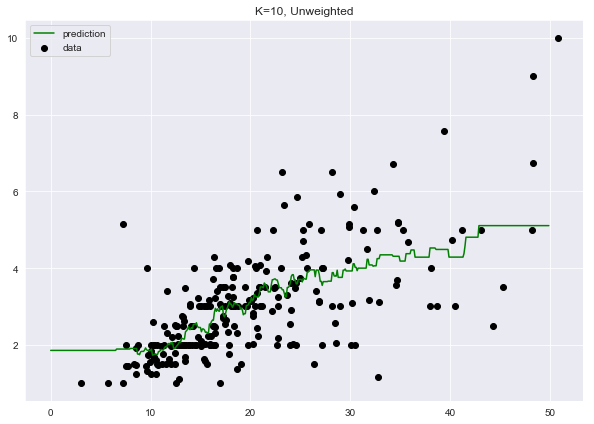

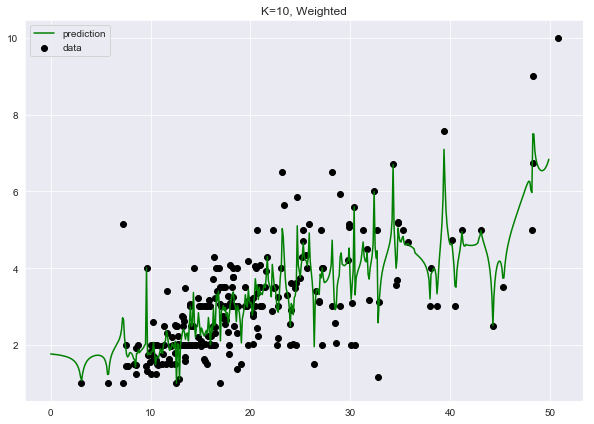

Unweighted Accuracy: 0.38 (+/-0.29)
Weighted Accuracy: 0.28 (+/- 0.30


K: 17


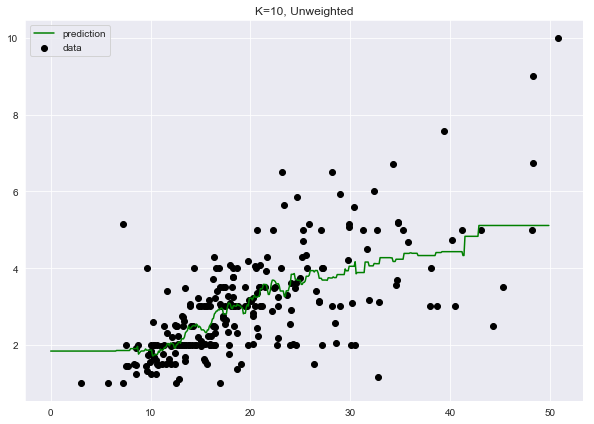

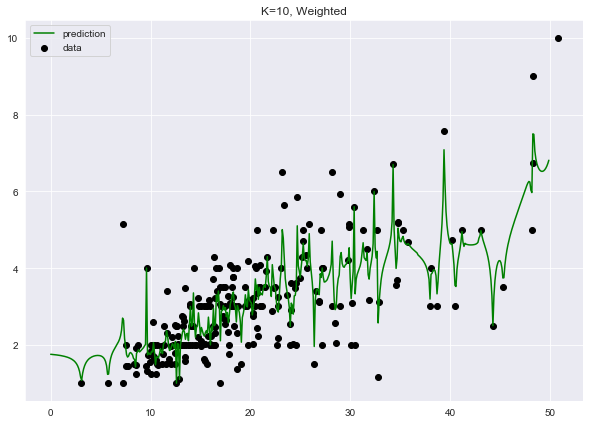

Unweighted Accuracy: 0.39 (+/-0.28)
Weighted Accuracy: 0.28 (+/- 0.30


K: 18


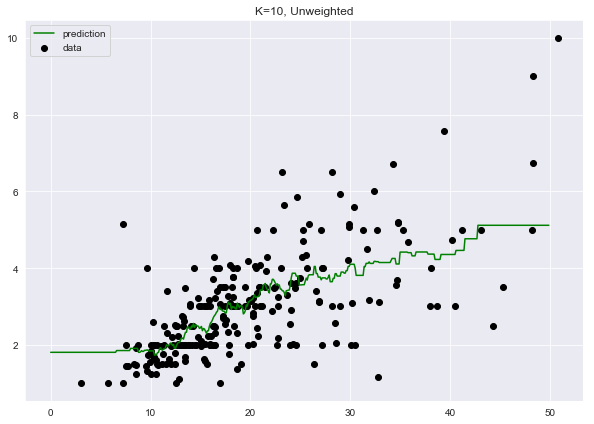

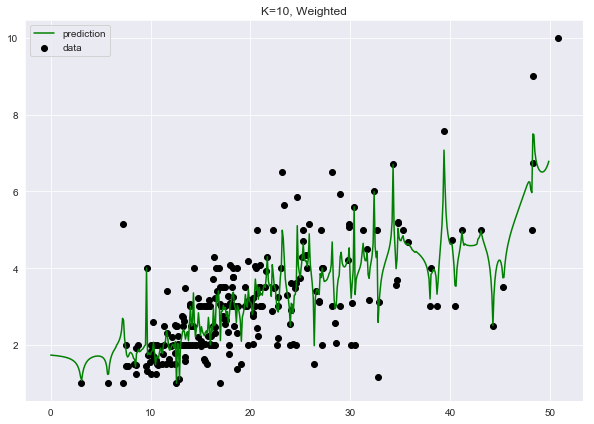

Unweighted Accuracy: 0.39 (+/-0.27)
Weighted Accuracy: 0.29 (+/- 0.30


K: 19


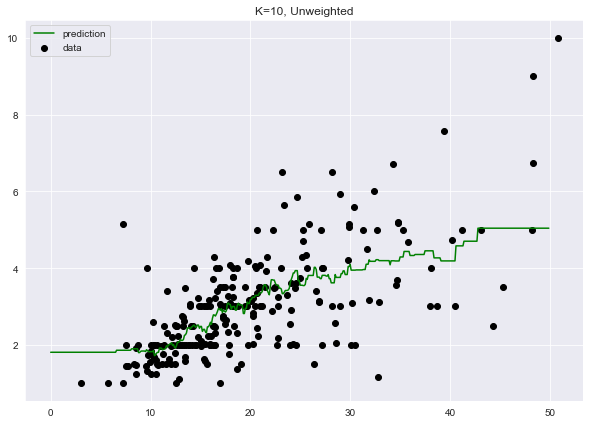

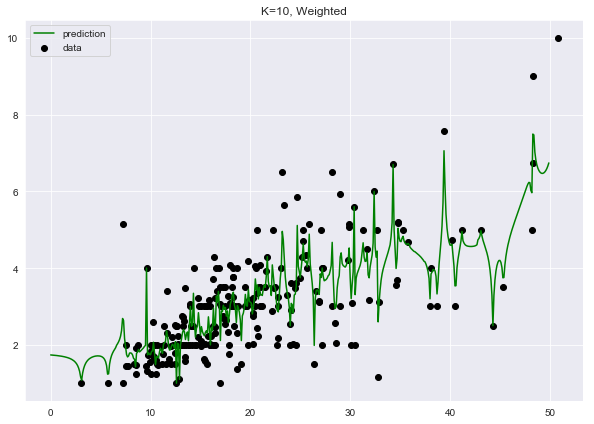

Unweighted Accuracy: 0.40 (+/-0.27)
Weighted Accuracy: 0.29 (+/- 0.30


K: 20


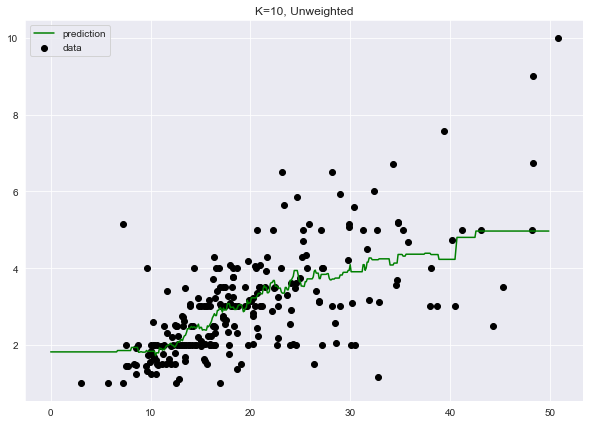

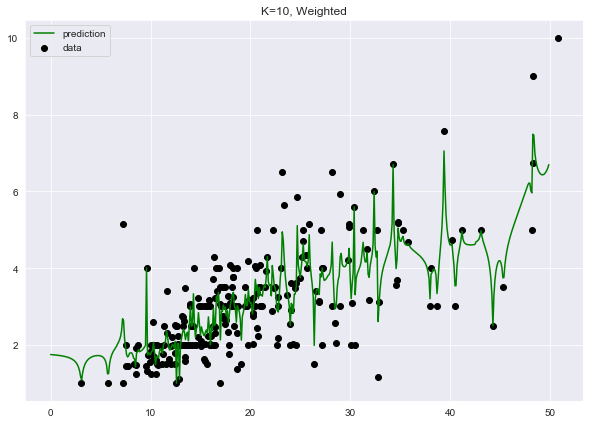

Unweighted Accuracy: 0.41 (+/-0.26)
Weighted Accuracy: 0.29 (+/- 0.30




In [103]:
for i in range(1,21):
    print('K:', i)

    # Build our model.
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X, y)

    # Set up our prediction line.
    T = np.arange(0, 50, 0.1)[:, np.newaxis]

    # Trailing underscores are a common convention for a prediction.
    Y_ = knn.predict(T)

    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, Y_, c='g', label='prediction')
    plt.legend()
    plt.title('K=10, Unweighted')
    plt.show()
    
    # Run the same model, this time with weights
    knn_w = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_w.fit(X, y)

    # Set up our prediction line
    T = np.arange(0, 50, 0.1)[:, np.newaxis] # tell me about this syntax

    Y_ = knn_w.predict(T)

    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, Y_, c='g', label='prediction')
    plt.legend()
    plt.title('K=10, Weighted')
    plt.show()
    
    score = cross_val_score(knn, X, y, cv=5)
    print('Unweighted Accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() *2))
    score_w = cross_val_score(knn_w, X, y, cv=5)
    print('Weighted Accuracy: %0.2f (+/- %0.2f' % (score_w.mean(), score_w.std() * 2))
    
    print()
    print()

Based off the of the accuracy scores of these two models it appears that Linear Regression performs better overall. From looking at the visualizations and my understand of OLS regression and KNN regression, My hypthesis is that there are some observations that become further apart as the values of x and y increase. The overall dataset is heteroscedastic. When using the KNN, the closest observations become further apart as x increases and becomes less reliable. Linear Regression, while not producing a score greater than .6 and a cross_val_score of .72.